# Predicting Global Covid-19 deaths based on multiple variables & determining the most severe disease transmission mode
<b>By Isaac Etungu</b>

<b>Data source:</b> https://covid19.who.int/table; As at July 1st 2021 at 7.47.07 PM

In [1]:
import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

if os.environ.get('RUNTIME_ENV_LOCATION_TYPE') == 'external':
    endpoint_3c26b3cf43444cc9a4694e4fe78b76af = 'https://s3.eu.cloud-object-storage.appdomain.cloud'
else:
    endpoint_3c26b3cf43444cc9a4694e4fe78b76af = 'https://s3.private.eu.cloud-object-storage.appdomain.cloud'

client_3c26b3cf43444cc9a4694e4fe78b76af = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='tqoX34AwpoDw7ySIINGXu5zYo6Lxsay7Pu94sMbYlg1S',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url=endpoint_3c26b3cf43444cc9a4694e4fe78b76af)

body = client_3c26b3cf43444cc9a4694e4fe78b76af.get_object(Bucket='covid19-donotdelete-pr-tk9irdpet5gshe',Key='WHO COVID-19 global table data July 1st 2021 at 7.47.07 PM.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_csv(body)
df_data_1.head()


,Name,WHO Region,Cases - cumulative total,Cases - cumulative total per 100000 population,Cases - newly reported in last 7 days,Cases - newly reported in last 7 days per 100000 population,Cases - newly reported in last 24 hours,Deaths - cumulative total,Deaths - cumulative total per 100000 population,Deaths - newly reported in last 7 days,Deaths - newly reported in last 7 days per 100000 population,Deaths - newly reported in last 24 hours,Transmission Classification
0,Global,NaN,181930736,2334.079081,2676885,34.343077,393657,3945832,50.623024,54833,0.70348,8097,NaN
1,United States of America,Americas,33317803,10065.720000,74274,22.440000,0,599089,180.990000,1717,0.52000,0,Community transmission
2,India,South-East Asia,30411634,2203.730000,328856,23.830000,48786,399459,28.950000,7478,0.54000,1005,Clusters of cases
3,Brazil,Americas,18513305,8709.710000,458652,215.780000,64903,515985,242.750000,11268,5.30000,1893,Community transmission
4,France,Europe,5664630,8709.540000,11050,16.990000,2457,110162,169.380000,204,0.31000,25,Community transmission


In [2]:
#Check no of rows & Columns in the dataset
df_data_1.shape

(238, 13)

In [3]:
#Checking Column headers in the dataset
df_data_1.columns

Index(['Name', 'WHO Region', 'Cases - cumulative total',
       'Cases - cumulative total per 100000 population',
       'Cases - newly reported in last 7 days',
       'Cases - newly reported in last 7 days per 100000 population',
       'Cases - newly reported in last 24 hours', 'Deaths - cumulative total',
       'Deaths - cumulative total per 100000 population',
       'Deaths - newly reported in last 7 days',
       'Deaths - newly reported in last 7 days per 100000 population',
       'Deaths - newly reported in last 24 hours',
       'Transmission Classification'],
      dtype='object')

In [4]:
#Understanding data types in the dataset of each column
df_data_1.dtypes

Name                                                             object
WHO Region                                                       object
Cases - cumulative total                                          int64
Cases - cumulative total per 100000 population                  float64
Cases - newly reported in last 7 days                             int64
Cases - newly reported in last 7 days per 100000 population     float64
Cases - newly reported in last 24 hours                           int64
Deaths - cumulative total                                         int64
Deaths - cumulative total per 100000 population                 float64
Deaths - newly reported in last 7 days                            int64
Deaths - newly reported in last 7 days per 100000 population    float64
Deaths - newly reported in last 24 hours                          int64
Transmission Classification                                      object
dtype: object

In [5]:
#getting more information about the columns
df_data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 13 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   Name                                                          238 non-null    object 
 1   WHO Region                                                    237 non-null    object 
 2   Cases - cumulative total                                      238 non-null    int64  
 3   Cases - cumulative total per 100000 population                237 non-null    float64
 4   Cases - newly reported in last 7 days                         238 non-null    int64  
 5   Cases - newly reported in last 7 days per 100000 population   237 non-null    float64
 6   Cases - newly reported in last 24 hours                       238 non-null    int64  
 7   Deaths - cumulative total                                     238 non-n

In [6]:
#Renaming columns (Just to make it easy to understand)
df_data_1.rename(columns = {'Name' : 'Country', 'WHO Region' : 'Region', 'Cases - cumulative total': 'Total cummulative cases',
                     'Cases - cumulative total per 100000 population': 'Total cummulative cases/100,000 Pn.' ,
                    'Cases - newly reported in last 7 days' : 'New cases reported in last 7days' , 'Cases - newly reported in last 7 days per 100000 population' : 
                    'New cases reported in last 7days/100,000 Pn.' , 'Cases - newly reported in last 24 hours' : 'New cases reported in last 24 hours' ,
                    'Deaths - cumulative total' : 'Total cumulative Deaths' , 'Deaths - cumulative total per 100000 population' : 'Total cumulative Deaths/100,000 Pn.' ,
                    'Deaths - newly reported in last 7 days' : 'New Deaths reported in last 7 days' , 'Deaths - newly reported in last 7 days per 100000 population' :
                    'New Deaths reported in last 7 days/100,000 Pn.' , 'Deaths - newly reported in last 24 hours' : 'New Deaths reported in last 24 hours'}, inplace = True)

In [7]:
#Checking the new data set
My_Newdata = pd.DataFrame(df_data_1)
My_Newdata

,Country,Region,Total cummulative cases,"Total cummulative cases/100,000 Pn.",New cases reported in last 7days,"New cases reported in last 7days/100,000 Pn.",New cases reported in last 24 hours,Total cumulative Deaths,"Total cumulative Deaths/100,000 Pn.",New Deaths reported in last 7 days,"New Deaths reported in last 7 days/100,000 Pn.",New Deaths reported in last 24 hours,Transmission Classification
0,Global,NaN,181930736,2334.079081,2676885,34.343077,393657,3945832,50.623024,54833,0.70348,8097,NaN
1,United States of America,Americas,33317803,10065.720000,74274,22.440000,0,599089,180.990000,1717,0.52000,0,Community transmission
2,India,South-East Asia,30411634,2203.730000,328856,23.830000,48786,399459,28.950000,7478,0.54000,1005,Clusters of cases
3,Brazil,Americas,18513305,8709.710000,458652,215.780000,64903,515985,242.750000,11268,5.30000,1893,Community transmission
4,France,Europe,5664630,8709.540000,11050,16.990000,2457,110162,169.380000,204,0.31000,25,Community transmission
...,...,...,...,...,...,...,...,...,...,...,...,...,...
233,Saint Helena,Africa,0,0.000000,0,0.000000,0,0,0.000000,0,0.00000,0,No cases
234,Tokelau,Western Pacific,0,0.000000,0,0.000000,0,0,0.000000,0,0.00000,0,No cases
235,Tonga,Western Pacific,0,0.000000,0,0.000000,0,0,0.000000,0,0.00000,0,No cases
236,Turkmenistan,Europe,0,0.000000,0,0.000000,0,0,0.000000,0,0.00000,0,No cases


In [8]:
#Set the country name as index - useful for quickly looking up countries using .loc method
#df_data_1.set_index('Country', inplace=True)
# let's view the first five elements and see how the dataframe was changed
#df_data_1.head()

In [9]:
#I will delete the first row of My_Newdata & assign it a new variable called Data; row lebelled 0
Data = My_Newdata.drop(labels=0, axis = 0)

In [10]:
#Preview the new Data
Data

,Country,Region,Total cummulative cases,"Total cummulative cases/100,000 Pn.",New cases reported in last 7days,"New cases reported in last 7days/100,000 Pn.",New cases reported in last 24 hours,Total cumulative Deaths,"Total cumulative Deaths/100,000 Pn.",New Deaths reported in last 7 days,"New Deaths reported in last 7 days/100,000 Pn.",New Deaths reported in last 24 hours,Transmission Classification
1,United States of America,Americas,33317803,10065.72,74274,22.44,0,599089,180.99,1717,0.52,0,Community transmission
2,India,South-East Asia,30411634,2203.73,328856,23.83,48786,399459,28.95,7478,0.54,1005,Clusters of cases
3,Brazil,Americas,18513305,8709.71,458652,215.78,64903,515985,242.75,11268,5.30,1893,Community transmission
4,France,Europe,5664630,8709.54,11050,16.99,2457,110162,169.38,204,0.31,25,Community transmission
5,Russian Federation,Europe,5538142,3794.95,149447,102.41,23543,135886,93.11,4423,3.03,672,Clusters of cases
...,...,...,...,...,...,...,...,...,...,...,...,...,...
233,Saint Helena,Africa,0,0.00,0,0.00,0,0,0.00,0,0.00,0,No cases
234,Tokelau,Western Pacific,0,0.00,0,0.00,0,0,0.00,0,0.00,0,No cases
235,Tonga,Western Pacific,0,0.00,0,0.00,0,0,0.00,0,0.00,0,No cases
236,Turkmenistan,Europe,0,0.00,0,0.00,0,0,0.00,0,0.00,0,No cases


In [11]:
Data.describe()

,Total cummulative cases,"Total cummulative cases/100,000 Pn.",New cases reported in last 7days,"New cases reported in last 7days/100,000 Pn.",New cases reported in last 24 hours,Total cumulative Deaths,"Total cumulative Deaths/100,000 Pn.",New Deaths reported in last 7 days,"New Deaths reported in last 7 days/100,000 Pn.",New Deaths reported in last 24 hours
count,2.370000e+02,236.000000,237.000000,236.000000,237.00000,237.000000,236.000000,237.000000,236.000000,237.000000
mean,7.676402e+05,3510.346271,11294.873418,45.783771,1661.00000,16649.080169,59.170169,231.362869,0.743432,34.164557
std,3.261788e+06,3984.433495,44209.240831,87.022306,6501.80134,63283.479112,80.368332,1022.887063,1.885286,159.767291
min,0.000000e+00,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,-1.000000
25%,4.079000e+03,237.597500,20.000000,1.385000,0.00000,37.000000,2.552500,0.000000,0.000000,0.000000
50%,4.083600e+04,1781.395000,352.000000,10.775000,30.00000,775.000000,22.015000,4.000000,0.070000,0.000000
75%,3.430080e+05,6252.650000,4124.000000,46.005000,558.00000,5484.000000,88.245000,56.000000,0.512500,7.000000
max,3.331780e+07,18004.270000,458652.000000,636.520000,64903.00000,599089.000000,583.320000,11268.000000,13.220000,1893.000000


<b>Checking for missing values for the columns</b>

In [12]:
print("number of NaN values for the column Total cummulative cases :", Data['Total cummulative cases'].isnull().sum())
print("number of NaN values for the column Total cummulative cases/100,000 Pn.:", Data['Total cummulative cases/100,000 Pn.'].isnull().sum())
print("New cases reported in last 7days :", Data['New cases reported in last 7days'].isnull().sum())
print("number of NaN values for the column New cases reported in last 7days/100,000 Pn. :", Data['New cases reported in last 7days/100,000 Pn.'].isnull().sum())
print("number of NaN values for the column New cases reported in last 24 hours :", Data['New cases reported in last 24 hours'].isnull().sum())
print("number of NaN values for the column Total cumulative Deaths:", Data['Total cumulative Deaths'].isnull().sum())
print("number of NaN values for the column Total cumulative Deaths/100,000 Pn. :", Data['Total cumulative Deaths/100,000 Pn.'].isnull().sum())
print("number of NaN values for the column New Deaths reported in last 7 days. :", Data['New Deaths reported in last 7 days'].isnull().sum())
print("number of NaN values for the column New Deaths reported in last 7 days/100,000 Pn.. :", Data['New Deaths reported in last 7 days/100,000 Pn.'].isnull().sum())
print("number of NaN values for the column New Deaths reported in last 24 hours. :", Data['New Deaths reported in last 24 hours'].isnull().sum())
print("number of NaN values for the column Transmission Classification :", Data['Transmission Classification'].isnull().sum())

number of NaN values for the column Total cummulative cases : 0
number of NaN values for the column Total cummulative cases/100,000 Pn.: 1
New cases reported in last 7days : 0
number of NaN values for the column New cases reported in last 7days/100,000 Pn. : 1
number of NaN values for the column New cases reported in last 24 hours : 0
number of NaN values for the column Total cumulative Deaths: 0
number of NaN values for the column Total cumulative Deaths/100,000 Pn. : 1
number of NaN values for the column New Deaths reported in last 7 days. : 0
number of NaN values for the column New Deaths reported in last 7 days/100,000 Pn.. : 1
number of NaN values for the column New Deaths reported in last 24 hours. : 0
number of NaN values for the column Transmission Classification : 0


In [13]:
#Regional distribution
Data['Region'].value_counts().to_frame()

,Region
Europe,62
Americas,56
Africa,50
Western Pacific,35
Eastern Mediterranean,22
South-East Asia,11
Other,1


# Data Analysis

<b>Model Development</b>

1. Linear regression model to try to predict deaths (y) based on cases(x) reported at various stages
2. And then develope a decision tree to check which transmission mode is more severe

In [14]:
#Import libraries 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression 
%matplotlib inline

# PART 1. LINEAR REGRESSION

# <b>1.a) Simple Linear Regression </b>

In [15]:
#Using identified cases to predict deaths
X = Data[['Total cummulative cases']] 
Y = Data['Total cumulative Deaths'] 
lm = LinearRegression() 
lm 
lm.fit(X,Y)

Yhat=lm.predict(X)
Yhat[0:5]

array([604269.04168528, 551804.69831664, 337007.13555653, 105053.21373298,
       102769.75744946])

In [16]:
#Calculating the value of the intercept, c
lm.intercept_

2791.062641186474

In [17]:
#Calculating the value of the slope, m
lm.coef_

array([0.01805275])

<b>1.a.a) Find the R^2 = coefficient of determination </b>

In [18]:
#The measure to indicate how close the data is to the fitted regression line. 
#The value of the R-squared is the percentage (%) of variation of the response variable (y) that is explained by a linear model
#Total cummulative cases_fit
lm.fit(X, Y)
# Find the R^2
print('The R-square is: ', lm.score(X, Y))

The R-square is:  0.8658000424354186


<b>1.a.b) Find the Mean Squared Error (MSE) </b>

In [19]:
#This measures the average of the squares of errors, that is, the difference between actual value (y) and the estimated value (ŷ)

In [20]:
#We can predict the output i.e., "y" using the predict method, where X is the input variable:
#Let's calculate the MSE of our data
y=lm.predict(X)
print('The output of the first five predicted value is: ', y[0:5])

The output of the first five predicted value is:  [604269.04168528 551804.69831664 337007.13555653 105053.21373298
 102769.75744946]


In [21]:
#Let's import the function mean_squared_error from the module metrics
from sklearn.metrics import mean_squared_error

In [22]:
#Now we can compare the predicted results with the actual results
mse = mean_squared_error(Data['Total cumulative Deaths'], y)
print('The mean square error of Total cumulative Deaths and predicted value is: ', mse)

The mean square error of Total cumulative Deaths and predicted value is:  535176123.9819026


<b>Therefore;</b> 
The Model for predicting deaths based on cases (y=mx
+c) is:

<b>Total Cummulative Deaths</b> = 0.01805275 X Toatal Cumulative cases + 2791.062641186474  <b> As at July 1st 2021 at 7.47.07 PM</b>

Approximately <b>86.58%</b> of the variation of the <b> Total Cumulative Deaths</b> is explained by this simple linear model "Total cumulative cases_fit"

# <b>1.b) Multiple Linear Regression </b>

Let's predict Total Cummulative deaths using more than one variable

In [23]:
# The different variables here are Total cummulative cases, New cases reported in last 7days,New cases reported in last 24 hours
Z = Data[['Total cummulative cases', 'New cases reported in last 7days','New cases reported in last 24 hours']]

In [24]:
#Fitting the linear model using the three above-mentioned variables.
lm.fit(Z, Data['Total cumulative Deaths'])

LinearRegression()

In [25]:
#Calculating the value of the intercept, c
lm.intercept_

1996.9213236379

In [26]:
##What are the values of the coefficients (b1, b2, b3)?
lm.coef_

array([ 0.01476862,  0.83018798, -3.64942427])

<b>1.b.a) Find the R^2 = coefficient of determination </b>

In [27]:
# fit the model 
lm.fit(Z, Data['Total cumulative Deaths'])
# Find the R^2
print('The R-square is: ', lm.score(Z, Data['Total cumulative Deaths']))

The R-square is:  0.8845461656005585


<b>1.b.b) Find the Mean Squared Error (MSE) </b>

In [28]:
#Produce the prediction
y_predict_multifit = lm.predict(Z)
print('The output of the first five predicted value is: ', y_predict_multifit[0:5])

The output of the first five predicted value is:  [555716.16518841 546106.17295463 419321.62057411  85862.61230322
 121938.32516483]


In [29]:
#Now we can compare the predicted results with the actual results
print('The mean square error of Total cumulative Deaths and predicted value using multifit is: ', \
      mean_squared_error(Data['Total cumulative Deaths'], y_predict_multifit))

The mean square error of Total cumulative Deaths and predicted value using multifit is:  460418443.59754777


<b>Therefore;</b>
The final estimated linear model that we get in the form: y = c + b1*x1 + b2*x2 + b3*x3

<b>Total Cummulative Deaths</b> = 1996.9213236379 + 0.01476862 * Total cummulative cases + 0.83018798 * New cases reported in last 7days - 3.64942427 * New cases reported in last 24 hours.  <b>As at July 1st 2021 at 7.47.07 PM</b>

Approximately <b>88.45%</b> of the variation of the Total Cumulative Deaths is explained by this simple linear model "Total cumulative cases_fit"

# Decision Making

1. One with the <b>biggest R-squared value</b> is the best; in this case Multiple linear regression had • R-squared value 0.8658000424354186 Simple linear regression had R-squared value 0.8658000424354186

2. Model with the <b>smallest MSE value</b> is a better fit for the data;

Simple Linear Regression: Using Cases as a Predictor Variable of Total cumulative Deaths.• MSE: 535176123.9819026

<b>Multiple Linear Regression</b>: Using Total cummulative cases, New cases reported in last 7days,New cases reported in last 24 hours as Predictor Variables of Total cumulative Deaths. • MSE: 460418443.59754777
        

# Conclusion:
Comparing these three models, I conclude that the Multiple Linear Regression model is the best model to be able to predict Total cumulative Deaths from our dataset. This result makes sense, since we have 3 variables in total, and we know that more than one of those variables are potential predictors of the final numbers of Deaths.

The Model for predicting Total cummulative cases, New cases reported in last 7days and New cases reported in last 24 hours for PART 1 of our project is;

# Total Cummulative Deaths = 1996.9213236379 + 0.01476862 * Total cummulative cases + 0.83018798 * New cases reported in last 7days - 3.64942427 * New cases reported in last 24 hours
As at July 1st 2021 at 7.47.07 PM

# PART 2. DECISION TREE ALGORITHM

To determine the most severe tansmission mode 

# Data Analysis

In [30]:
#Importing libraries
import itertools
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
%matplotlib inline

In [31]:
%%capture
! pip install seaborn

In [32]:
#sorting transmission classification
Data['Transmission Classification'].value_counts().to_frame()

,Transmission Classification
Community transmission,149
Clusters of cases,41
No cases,25
Sporadic cases,18
Pending,3
Not applicable,1


In [33]:
#Printing what will help in this analysis
Data[['Total cumulative Deaths','Total cummulative cases','New cases reported in last 7days',
      'New Deaths reported in last 24 hours', 
      'Transmission Classification']].head()

,Total cumulative Deaths,Total cummulative cases,New cases reported in last 7days,New Deaths reported in last 24 hours,Transmission Classification
1,599089,33317803,74274,0,Community transmission
2,399459,30411634,328856,1005,Clusters of cases
3,515985,18513305,458652,1893,Community transmission
4,110162,5664630,11050,25,Community transmission
5,135886,5538142,149447,672,Clusters of cases


In [34]:
#Use 'one hot encoding technique' to convert categorical varables to binary variables and append them to the New_df Data Frame
New_df = Data[['Total cummulative cases','Total cumulative Deaths']]
New_df = pd.concat([New_df,pd.get_dummies(Data['Transmission Classification'])], axis=1)
New_df.drop(['No cases'], axis = 1,inplace=True)
New_df.drop(['Pending'], axis = 1,inplace=True)
New_df.drop(['Not applicable'], axis = 1,inplace=True)
New_df.head()

,Total cummulative cases,Total cumulative Deaths,Clusters of cases,Community transmission,Sporadic cases
1,33317803,599089,0,1,0
2,30411634,399459,1,0,0
3,18513305,515985,0,1,0
4,5664630,110162,0,1,0
5,5538142,135886,1,0,0


# Pre-processing
Using New_df as the WHO COVID-19 global table data July 1st 2021 at 7.47.07 PM.csv data read by pandas, declare the following variables:

X as the Feature Matrix (data of New_df)

y as the response vector (target)

In [35]:
from sklearn import preprocessing

In [36]:
#Assign X to New_df as new data set
X = New_df
#Print first five columns
X[0:5]

,Total cummulative cases,Total cumulative Deaths,Clusters of cases,Community transmission,Sporadic cases
1,33317803,599089,0,1,0
2,30411634,399459,1,0,0
3,18513305,515985,0,1,0
4,5664630,110162,0,1,0
5,5538142,135886,1,0,0


<b>Checking the data labels</b> y

In [37]:
y = Data['Transmission Classification'].values
y[0:5]

array(['Community transmission', 'Clusters of cases',
       'Community transmission', 'Community transmission',
       'Clusters of cases'], dtype=object)

In [38]:
#Lets assign intergies to our labels for easy analysie. We call in the replace function to do so
y_collection = Data['Transmission Classification'].replace(to_replace=['Community transmission', 'Clusters of cases','Sporadic cases'], value=[2,1,0]).values
y_collection[0:5]

array([2, 1, 2, 2, 1], dtype=object)

# Normalizing the Data

In [39]:
#Data Standardization give data zero mean and unit variance
from sklearn.preprocessing import StandardScaler
X_initial = X
scaler = preprocessing.StandardScaler().fit(X_initial)
X= scaler.transform(X)
X[0:5]

array([[10.00035837,  9.22314333, -0.45736602,  0.76850766, -0.28669109],
       [ 9.10749858,  6.06193126,  2.18643267, -1.3012232 , -0.28669109],
       [ 5.45198524,  7.90716193, -0.45736602,  0.76850766, -0.28669109],
       [ 1.50449793,  1.48081035, -0.45736602,  0.76850766, -0.28669109],
       [ 1.46563713,  1.88815904,  2.18643267, -1.3012232 , -0.28669109]])

In [40]:
#Import libraries
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [41]:
!pip install six

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes


In [42]:
!pip install pydotplus

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes


In [43]:
import six
import sys
sys.modules['sklearn.externals.six'] = six
from six import StringIO
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [44]:
#Build an empty DecisionTree object with depth 4
CovidTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
CovidTree # it shows the default parameters

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [45]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import Binarizer
from sklearn.preprocessing import StandardScaler 
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[10.00035837,  9.22314333, -0.45736602,  0.76850766, -0.28669109],
       [ 9.10749858,  6.06193126,  2.18643267, -1.3012232 , -0.28669109],
       [ 5.45198524,  7.90716193, -0.45736602,  0.76850766, -0.28669109],
       [ 1.50449793,  1.48081035, -0.45736602,  0.76850766, -0.28669109],
       [ 1.46563713,  1.88815904,  2.18643267, -1.3012232 , -0.28669109]])

In [46]:
conda update scikit-learn

Solving environment: - 

Updating scikit-learn is constricted by 

ibm-wsrt-py37main-main -> requires scikit-learn==0.23.1[build=*]

If you are sure you want an update of your package either try `conda update --all` or install a specific version of the package you want using `conda install <pkg>=<version>`

done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [47]:
#Train the decision tree using the global X data set.
CovidTree.fit(X_initial, y)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

<b>Now let's Print the Decision Tree</b>

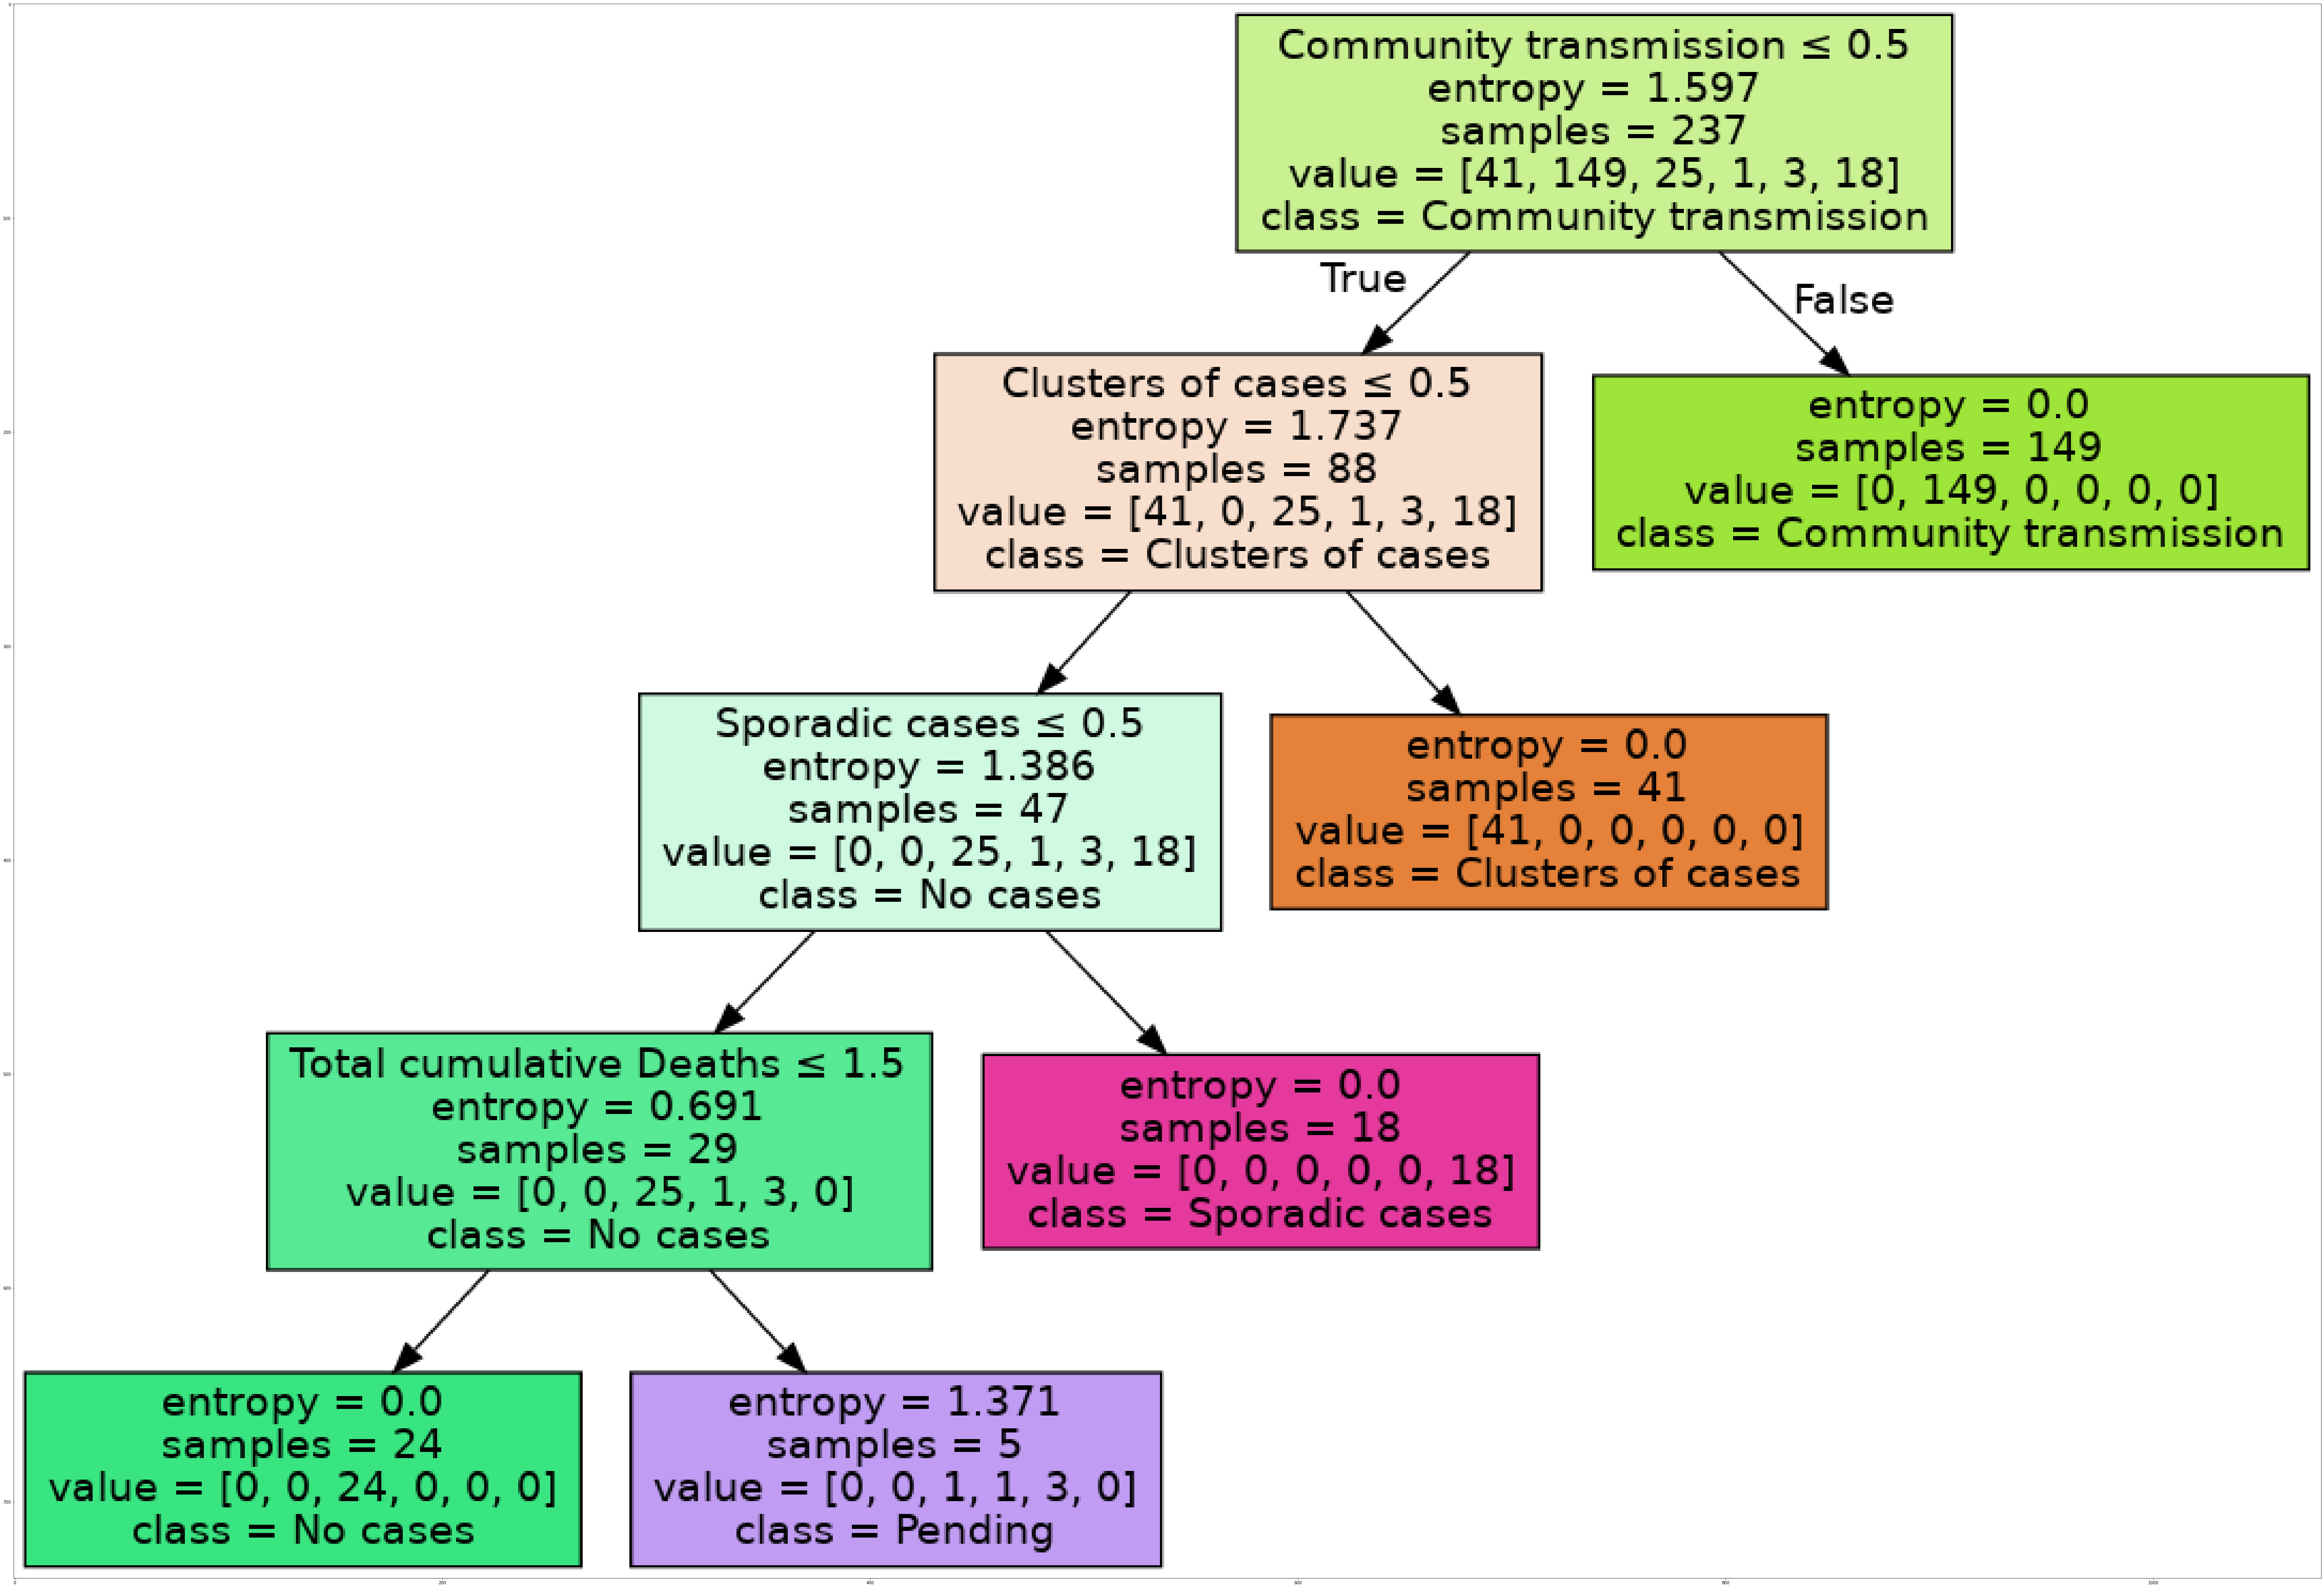

In [48]:
from six import StringIO
from sklearn.externals.six import StringIO
dot_data = StringIO()
filename = "TCtree.png"
New_dfNames = New_df.columns
targetNames = Data['Transmission Classification'].tolist()
out=tree.export_graphviz(CovidTree,feature_names=New_dfNames, out_file=dot_data, class_names= np.unique(y), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')

In [49]:

from sklearn.datasets import load_iris
from sklearn import tree
clf = tree.DecisionTreeClassifier()
iris = load_iris()
clf = clf.fit(iris.data, iris.target)
tree.export_graphviz(clf, out_file='tree.dot')

# Evaluating the Accuracy of Decison Tree Algorithm
Use Decision Tree object previously trained.

In [50]:
yhat_tree=CovidTree.predict(X_initial)
tree_jacc_test=metrics.jaccard_score(y, yhat_tree, average='micro')
tree_f1_test=metrics.f1_score(y, yhat_tree, average ='macro')
tree_cnf_matrix = confusion_matrix(y, yhat_tree)
print("Accuracy is ", tree_jacc_test, " F1 is" , tree_f1_test)
print(classification_report(y, yhat_tree))
tree_cnf_matrix

Accuracy is  0.9832635983263598  F1 is 0.788265306122449
                        precision    recall  f1-score   support

     Clusters of cases       1.00      1.00      1.00        41
Community transmission       1.00      1.00      1.00       149
              No cases       1.00      0.96      0.98        25
        Not applicable       0.00      0.00      0.00         1
               Pending       0.60      1.00      0.75         3
        Sporadic cases       1.00      1.00      1.00        18

              accuracy                           0.99       237
             macro avg       0.77      0.83      0.79       237
          weighted avg       0.99      0.99      0.99       237



/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([[ 41,   0,   0,   0,   0,   0],
       [  0, 149,   0,   0,   0,   0],
       [  0,   0,  24,   0,   1,   0],
       [  0,   0,   0,   0,   1,   0],
       [  0,   0,   0,   0,   3,   0],
       [  0,   0,   0,   0,   0,  18]])

# REMARKS
The Accuracy is 0.98 and F1 is 0.78 :This indicates that the <b>Community Transmission</b> mode is the most significant and dangerous mode of transmission of Covid-19 at the moment (in the entire world). This reqiuires nterventions from governments, Health authorities and every body so as to curb the spread of the disease.

# Thank You